In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
len(tf.config.list_physical_devices('GPU'))

1

In [4]:
from keras.applications.resnet import ResNet50
model = ResNet50()
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
from keras.layers import Flatten,Dropout,Dense,Activation,Input
from keras.models import Model
new_input = Input(shape=(224, 224, 1))
model1 = ResNet50(include_top = False, input_shape=(112,112,3))
layer = model1.get_layer('conv4_block6_out').output
print(layer.shape)
x = Flatten()(layer)
x = Dropout(0.5)(x)
x = Dense(512,activation = 'relu')(x)
x = Dropout(0.25)(x)
x = Dense(256,activation = 'relu')(x)
x = Dropout(0.25)(x)
out = Dense(4,activation = 'softmax')(x)
model = Model(model1.input,out)
print(out.shape)

(None, 7, 7, 1024)
(None, 4)


In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 112, 112, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 118, 118, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 56, 56, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 56, 56, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [4]:
def import_maps(path):
    images = []
    for index, name in enumerate(os.listdir(path)):
        folder = os.path.join(path, name)
        for file_class in os.listdir(folder):
            im_folder = os.path.join(folder, file_class)
            for im in os.listdir(im_folder):
                img = cv2.imread(os.path.join(im_folder, im))
                #print(img.shape)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                    img1 = cv2.resize(img, (112, 112))
                    img = np.dstack((img1,img1,img1))
                if img is not None:
               #     img = (img-np.mean(img))/np.std(img)
                    images.append((np.array(img), index)) 
    return images

In [5]:
image_train_set = import_maps(r'C:\Users\AIIMS-IITD\Desktop\Sanjeev\4_class_cluster_volume\Train')
image_test_set = import_maps(r'C:\Users\AIIMS-IITD\Desktop\Sanjeev\4_class_cluster_volume\Test')

In [6]:
len(image_train_set)

17005

In [7]:
len(image_test_set)

2160

In [9]:
train_images_all = [i[0] for i in image_train_set]
train_images_array = np.array(train_images_all)
#train_images_array=np.expand_dims(train_images_array,axis=3)
train_image_label = [i[1] for i in image_train_set]
train_image_label = np.array(train_image_label)

In [10]:
test_images_all = [i[0] for i in image_test_set]
test_images_array = np.array(test_images_all)
test_images_array=np.expand_dims(test_images_array,axis=3)
test_image_label = [i[1] for i in image_test_set]
test_image_label = np.array(test_image_label)

In [11]:
scalar = StandardScaler(copy=False)
train_images = scalar.fit_transform(train_images_array.reshape(len(train_images_array), 112*112*3))
train_images_array = train_images.reshape(len(train_images_array), 112,112, 3)

In [12]:
test_image = scalar.fit_transform(test_images_array.reshape(len(test_images_array),112*112*3))
test_image_array = test_image.reshape(len(test_images_array),112,112,3)

In [13]:
#train_x, val_x, train_y, val_y = train_test_split(train_images_array,train_image_label,test_size=0.2)

In [14]:
enc = OneHotEncoder(handle_unknown='ignore')
train_label_enc = enc.fit_transform(train_image_label.reshape(-1, 1)).toarray()
#val_label_enc = enc.fit_transform(val_y.reshape(-1, 1)).toarray()
test_label_enc = enc.fit_transform(test_image_label.reshape(-1, 1)).toarray()

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer = keras.optimizers.SGD(0.001),metrics=['accuracy','AUC'])

In [16]:
history = model.fit(train_images_array,train_label_enc,validation_data=(test_image_array,test_label_enc), batch_size=32, epochs=250, verbose=1,shuffle=True)

Epoch 1/250
518/518 [==============================] - 61s 67ms/step - loss: 0.9716 - accuracy: 0.6051 - auc: 0.8405 - val_loss: 4.6645 - val_accuracy: 0.2831 - val_auc: 0.5095ss: 1.8145 - accuracy: 0.3381 - ETA: 29s - loss: 1.7051 - accuracy: - ETA: 28s - loss: 1.6044 - accu - ETA: 26s - loss: 1.5132 - acc - ETA: 24s - loss: 1.4456 - accuracy: 0.4128 - auc: 0 - ETA: 24s - loss: 1.4318 - accuracy: 0.4173 - auc: 0. - ETA: 24s - loss: 1.4254 - accuracy: 0.4192 - auc - ETA: 23s - loss: 1.4094 - accuracy: 0. - ETA: 22s - loss: 1.3776 - accuracy: 0.4346 - auc:  - ETA: 22s - loss: 1.3671 - accuracy: 0.4379 - auc: 0 - ETA: 21s - loss: 1.3577 - accuracy: 0.4414 -  - ETA: 20s - loss: 1.3381 - accuracy: 0.4482 -  - ETA: 20s - loss: 1.3229 - accuracy: 0.4541 - auc: - ETA: 19s - loss: 1.3119 - accuracy: 0.4576 - auc - ETA: 19s - loss: 1.2996 - accuracy: 0.4628 - auc - ETA: 18s - loss: 1.2874 - accuracy: 0.4668 - auc: - ETA: 18s - loss: 1.2766 - accuracy: 0. - ETA: 16s - loss: 1.2530 - accuracy: 0.

518/518 [==============================] - 33s 63ms/step - loss: 0.0030 - accuracy: 0.9992 - auc: 1.0000 - val_loss: 4.2383 - val_accuracy: 0.4192 - val_auc: 0.6411 loss: 0.0024 - accuracy: 1.0000 - auc: 1.000 - ETA: 30s - loss: 0.0029 - accuracy: 1.0000 - auc - ETA: 29s - loss: 0.0026 - accuracy: 1.0000 - - ETA: 28s - loss: 0.0023 - accuracy: 1.0000 - auc:  - ETA: 28s - loss: 0.0021 - accuracy: 1.0000 - auc: 1.000 - ETA: 28s - loss: 0.0021 - accura - ETA: 26s - loss: 0.0024 - accuracy: 0.9996 - auc: 1 - ETA: 26s - loss: 0.0023 - accuracy: 0.9996 - auc: 1.0 - ETA: 26s - loss: 0.0022 - accuracy: 0.9996 - au - ETA: 25s - loss: 0.0023 - a - ETA: 23s - loss: 0.0028 - accuracy: 0.9995 - a - ETA: 23s - loss: 0.0029 - accuracy: 0.9995 - auc: 1.000 - ETA: 22s - loss: 0.0029 - accu - ETA: 21s - loss: 0.0026 - accuracy: 0.9996 - a - ETA: 20s - loss: 0.0025 - accuracy: 0.9 - ETA: 19s - loss: 0.0025 - accuracy: 0.9997 - auc:  - ETA: 19s - loss: 0.0025 - accuracy: 0.9997 - auc:  - ETA: 19s - loss: 

518/518 [==============================] - 33s 63ms/step - loss: 0.0013 - accuracy: 0.9996 - auc: 1.0000 - val_loss: 4.7680 - val_accuracy: 0.4142 - val_auc: 0.627030s - loss: 0.0049 - accuracy: 0. - ETA: 29s - loss: 0.0025 - accuracy: 0.9991 - auc: 1.000 - ETA: 29s - loss: 0.0024 - - ETA: 27s - loss: 0.0024 - accuracy: 0.9 - ETA: 26s - loss: 0.0020 - accuracy: 0.9993 - a - ETA: 25s - loss: 0.0019 - accuracy: 0.9993 - au - ETA: 24s - loss: 0.0017 - acc - ETA: 23s - loss:  - ETA: 20s - loss: 0.0013 - accur - ETA: 18s - loss: 0.0014 - accuracy: - ETA: 17s - loss: 0.0013 - accuracy: 0.9996 - auc - ETA: 16s - loss: 0.0012 - accuracy: 0.9996 - auc: 1.0 - ETA: 16s - loss: 0.0012 - accuracy: 0.9 - ETA: 15s - loss: 0.0012 - accuracy: 0.9995 - ETA: 14s - loss: 0.0012 - accuracy: 0.99 - ETA: 13s - loss: 0.0011 - accura - ETA: 11s - loss: 0.0011 - accuracy: 0.9996 -  - ETA: 11s - loss: 0.0010 - accuracy: 0.9996 - au - ETA: 10s - loss: 0.0010 - accuracy: 0.9996 -  - ETA: 6s - loss: 9.1253e-04 - ac

518/518 [==============================] - 33s 63ms/step - loss: 4.0597e-04 - accuracy: 0.9999 - auc: 1.0000 - val_loss: 5.0684 - val_accuracy: 0.4192 - val_auc: 0.6299- loss: 1.4398e-04 - accuracy: 1.0000 - auc: 1.000 - ETA: 29s - l - ETA: 26s - loss: 3.3535e-04 - accuracy: 1 - ETA: 25s - loss: 2.9652e-04 - accuracy: 1.00 - ETA: 24s - loss: 2.8020e-04  - ETA: 22s - loss: 2.9236e-04 - accuracy: 1.0000 - auc: 1.0 - ETA: 22s - loss: 2.8970e-04 - accuracy: 1.0000 - - ETA: 21s - loss: 2.8575e-04 - accuracy: 1.0000 - auc:  - ETA: 21s - loss: 2.8117e-04 - accuracy: 1. - ETA: 20s - loss: 2.9729e- - ETA: 18s - loss: 3.3647e-04 - accuracy: 1.0000 - auc - ETA: 17s - loss: 3.4072e-04 - accuracy: 1.00 - ETA: 6s - loss: 3.0850e-04 - accuracy: 1.0000 - ETA:  - ETA: 2s - loss: 4.3115e-04 - accuracy: 0.9999 - a - ETA: 0s - loss: 4.0902e-04 - accuracy: 0.9999 - auc
Epoch 40/250
518/518 [==============================] - 33s 63ms/step - loss: 6.4662e-04 - accuracy: 0.9999 - auc: 1.0000 - val_loss: 4.856

518/518 [==============================] - 33s 63ms/step - loss: 4.8398e-04 - accuracy: 0.9998 - auc: 1.0000 - val_loss: 5.0330 - val_accuracy: 0.4107 - val_auc: 0.6331TA: 30s - loss: 1.3294e-04 - accuracy: 1.0000 - auc: 1 - ETA: 30s - - ETA: 27s - loss: 1.9096e-04 -  - ETA: 21s - loss: 2.4336e-04 - accuracy: 1.0000 - auc: 1.00 - ETA: 20s - loss: 2.4085e-04 - accuracy: 1.0000 - auc: 1.00 - ETA: 20s - loss: 2.3824e-04 - accuracy: 1.0000 - au - ETA: 20s - loss: 2.4376e-04 - accuracy: 1.0000 - auc: 1. - ETA: 20s - loss: 2.3917e-04 - accuracy:  - ETA: 18s - loss: 2.3951e-04 - accuracy: 1.0000 - auc: 1.000 - ETA: 18s - loss: 2.3849e-04 - accuracy: 1.0000 - auc: 1 - ETA: 18s - loss: 2.3559e-04 - accuracy: 1.0000 - a - ETA: 17s - loss: 2.2900e-04 - accuracy: 1.0000 -  - ETA: 17s - loss: 2.2744e - ETA: 14s - loss: 2.3825e-04 - accuracy: 1.0000 -  - ETA: 14s - loss: 2.2902e-04 -  - ETA: 12s - loss: 3.2723e-04 - accuracy: 0.99 - - ETA: 4s - loss: 5.1195e-04 - accuracy: 0. - E - ETA: 2s - loss: 4

518/518 [==============================] - 33s 63ms/step - loss: 2.1570e-04 - accuracy: 0.9999 - auc: 1.0000 - val_loss: 5.1337 - val_accuracy: 0.4142 - val_auc: 0.6405 - loss: 9.0041e-05 - accuracy: - ETA: 28s - loss: 1.5898e-04 - accuracy:  - ETA: 27s - loss: 0.0010 - accuracy: 0.9995 -  - ETA: 26s - loss: 8.8147e-04 - accuracy: 0.9996 - auc: - - ETA: 21s - loss: 5.0203e-04 - accuracy: 0.9998 - - ETA: 20s - loss - ETA: 17s - loss: 3.9000e-04 - accuracy: 0.99 - ETA: 16s - loss: 3.7127e-0 - ETA: 14s - loss: 3.3654e-04 - accuracy: 0.99 - ETA: 13s - loss: 3.1894e-04 - accuracy: 0.9999 - auc: 1. - ETA: 13s - loss: 3.1393e- - ETA: 10s - los - ETA: 6s - loss: 2.4938e-0 - ETA: 5s - loss: 2.4468e-04 - accuracy: 0.9999 - auc - ETA: 5s - loss: 2.4247e-04 - accuracy: 0.9999 - auc:  - ETA: 5s - loss: 2.4388e-04 - accuracy: 0.99 - ETA: 4s - loss: 2.4001e-04 - accura - ETA: 3s - loss: 2.344 - ETA: 2s - loss: 2.2701e-04 - ac - ETA: 1s - loss: 2.2199e-04 - accu - ETA: 1s - loss: 2.1696e-04 - accuracy

518/518 [==============================] - 33s 63ms/step - loss: 1.8815e-04 - accuracy: 0.9999 - auc: 1.0000 - val_loss: 5.4831 - val_accuracy: 0.4211 - val_auc: 0.63030s - loss: 7.1537e-05 - accuracy: 1.0000 - auc: 1.000 - ETA: 30s - loss: 6.7121e-05 - accuracy: 1.0000 - auc: 1. - ETA: 30s - loss: 6.7591e-05 - accuracy: 1.00 - ETA: 29s - loss: 8.6246e-05 - accuracy: 1.0000 -  - ETA: 28s - loss: 1.2271e-04 - accuracy: 1.0 - ETA: 27s - loss: 9.3375e-05 - accuracy: 1.0000 - auc: 1.000 - ETA: 27s - loss: 9.2123e-05 - accuracy: 1.00 - ETA: 26s - loss: 8.0581e-05 - accuracy: 1.0000 - auc: 1 - ETA: 25s - loss: 7.6691e-05 - accuracy: 1.0000 - auc: 1 - ETA: 25s - loss: 7.3374e-05 - a - ETA: 23s - loss: 7.9522e-05 - accuracy: 1.0000 - auc - ETA: 22s - loss: 7.6654e-05 - accuracy: 1.0000 - auc: 1.000 - ETA: 22s - loss: 7.6104e-05 - a - ETA: 21s - loss: 6.8496e-05 - accuracy: 1.0000 - a - ETA: 20s - loss: 7.0943e-05 - accuracy: 1.0000 - auc: 1.000 - ETA: 20s - loss: 7.0768e- - ETA: 17s - loss: 6.

518/518 [==============================] - 33s 63ms/step - loss: 1.6257e-04 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 5.8225 - val_accuracy: 0.4088 - val_auc: 0.626427s - loss: 2.0274e-04 - accuracy: - ETA: 26s - loss: 1.5698e-04 - accuracy - ETA: 24s - loss: 1.3319e-04 - accuracy: 1.0000 - auc: 1.000 - ETA: 24s - loss: 1.4047e-04 - accuracy: 1.0000 - a - ETA: 23s - loss: 1.2800e-04 - accuracy: 1.00 - ETA: 22s - loss: 1.1365e-04 - ETA: 20s - loss: 1.4551e-04 - accuracy: 1.0000 - auc - ETA: 20s - loss: 1.3963e-04 - accuracy: 1.0000 - auc: 1 - ETA: 20s - loss: 1.3638e-04 - accuracy: 1.0000 - auc: 1. - ETA: 19s - loss: 1.337 - ETA: 17s - loss: 1.6095e-04 - accuracy: 1.0000 - auc - ETA: 16s - loss: 1.7188e-04 - accuracy: 1.0000 -  - ETA: 16s - lo - ETA: 12s - loss: 1.4658e-04 - accura - ETA: 11s - loss: 1.3767e-04 - accuracy: 1.0000 - auc: 1. - ETA: 11s - loss: 1.3641e-04 - accuracy: 1.0000 - auc:  - ETA: 10s - loss: 1.3529e-04 - accuracy: 1.0000 - auc: 1 - ETA: 10s - loss: 1.3425e-04 -

518/518 [==============================] - 33s 63ms/step - loss: 2.5552e-04 - accuracy: 0.9999 - auc: 1.0000 - val_loss: 5.4189 - val_accuracy: 0.4218 - val_auc: 0.6415: 4.1686e-05 - accuracy: 1.0000 - a - ETA: 27s - loss: 2.9512e-04 - accuracy: 1 - ETA: 25s - loss: 2.2985e-04 - accuracy: 1.0 - ETA: 24s - loss: 2.1686e-04 - accuracy: 1.0 - ETA: 19s - loss: 1.5051e-04 - accuracy: 1.0000 - auc: 1.000 - ETA: 19s - loss: 1.4976e-04 - accur - ETA: 18s - loss: 1.3590e-04 - accuracy: 1.0000 - auc: 1.0 - ETA: 18s - loss: 1.3403e-04 - accuracy: 1 - ETA: 17s - loss: 1.2525e-04 - accuracy: 1.0000 - auc: - ETA: 16s - loss: 1.2186e-04 - accuracy: 1.0000 - ETA: 15s - loss: 2.4608e-04 - accuracy: 0.9999 - ETA: 10s - loss: 1.9693e-04 - accuracy: 0.9999 - auc: 1.0 - ETA: 10s - loss: 1.9529e-04 - ac - ETA: 7s - loss: 3.1757e-04 - accuracy: 0.9998 - auc: 1. - ETA: 7s - loss: 3.1599e-04 - accuracy: 0.9998 - a - ETA: 6s - loss: 3.1220e-04 - accuracy - - ETA: 4s - loss: 2.8373e-04  - ETA: 1s - loss: 2.6389e

518/518 [==============================] - 33s 63ms/step - loss: 9.5812e-05 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 5.4650 - val_accuracy: 0.4165 - val_auc: 0.632829s - loss: 2.4980e-05 - accuracy: 1.0000 -  - ETA: 20s - loss: 8.1015e-05 - accuracy: - ETA: 19s - loss: 8.1227e-05 - accuracy: 1.0000 - au - ETA: 19s - loss: 8.0906e-05 - accur - ETA: 17s - loss: 8.6217e-05 - accuracy: 1.0000 - auc: 1. - ETA: 17s - loss: 8.4945e-05 -  - ETA: 15s - loss: 8.1549e-05 - accuracy: 1.0000 - auc - ETA: 14s - loss: 7. - ETA: 12s - loss: 9.3399e-05 - accuracy: 1.0000 - auc - ETA: 11s - loss: 9.2106e-05 - ac - ETA: 9s - loss: 9.9127e-05 - accuracy: 1.0000 - auc - ETA: 9s - l - ETA: 6s - loss: - ETA: 4s - loss: 9 - ETA: 3s - loss: 9.6169e-05 - accuracy: 1.00 - ETA: 2s - loss: 9.7513e-05 - accuracy - ETA: 1s - loss: 9.6121e-05 - accuracy: 1.0000 - auc: 1.00 - ETA: 1s - loss: 9.5931e-05 - accuracy: 1.0000 - auc: 1.00 - ETA: 1s - loss: 9.573 - ETA: 0s - loss: 9.5678e-05 - accura
Epoch 125/250
518/51

518/518 [==============================] - 33s 63ms/step - loss: 1.3663e-04 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 5.3659 - val_accuracy: 0.4073 - val_auc: 0.638621s - loss: 2.7877e-04 - accuracy: - ETA: 19s - loss: 2.4792e-04 - accuracy: 1.0000 - auc: 1.000 - ETA: 19s - loss: 2.5774e-04 - accuracy: 1.0000 - a - ETA: 18s - loss: 2.4557e-04 - accuracy: 1.0000 - - ETA: 18s - loss: 2.3154e-0 - ETA: 16s - loss: 2.1845e-04 - accuracy: 1.0000 - auc: 1 - ETA: 15s - loss: 2.2069e-04 - accuracy: 1.0000  - ETA: 15s - loss: 2.1347e-04 - accuracy: 1.0000 - - ETA: 14s - loss: 2.0462e-04 - accuracy: 1.0000 - a - ETA: 13s - loss: 1.9785e-04 - accuracy: 1.0000 - auc - ETA: 13s - loss: 1.9281e-04 - accuracy: 1.0000 - auc: 1.0 - ETA: 12s - loss: 1.9585e-04 - accuracy: - ETA: 11s - loss: 1.8320e-04 - accuracy: 1.00 - ETA: 10s - loss: 1.7950e-04 - accuracy: 1.0000 - auc - ETA: 9s - loss: 1.7568e-0 - ETA: 8s - loss: 1.6694e-0 - ETA: 7s - loss: 1.6171e-04 - accuracy: 1. - ETA: 7s - loss: 1.6453e-04 - 

518/518 [==============================] - 33s 63ms/step - loss: 1.1000e-04 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 5.4851 - val_accuracy: 0.4061 - val_auc: 0.6305A: 30s - loss: 4.2772e-05 - accuracy: 1.0000 - auc:  - ETA: 25s - loss: 2.6280e-05 - accuracy: 1. - ETA: 24s - loss: 2.3195e-05 - accuracy: 1.0000 - auc: 1. - ETA: 24s - loss: 2.2466e-05 - acc - ETA: 22s - loss: 1.75 - ETA: 19s - loss: 1.4347e-04 - accuracy: 1.0000 - a - ETA: 19s - loss: 2.3524e-04 - accuracy: 1.0000  - ETA: 18s - loss: 2.2130e-04 - accuracy: 1.000 - ETA: 17s - loss: 2.0770e-04 - accuracy: 1.0000 - auc:  - ETA: 17s - loss: 2.0259e-04 - accuracy: 1.0000 - auc: 1 - ETA: 16s - loss: 1.9786e-04 - accuracy: 1.0000 -  - ETA: 15s - loss: 1.888 - ETA: 13s - loss: 1.6566e-04 - accuracy: 1.000 - ETA - ETA: 7s - loss: 1.3149e-04 - accu - ETA: 6s - loss: 1.2890e-04 - accu - ETA: 5s - loss: 1.2711e-04  - ETA: 4s - loss: 1.2291e-04 -  - ETA: 3s - loss: 1.2236e-04 - accu - ETA: 2s - loss: 1.1942e-04 - accuracy: 1.0000 

518/518 [==============================] - 33s 63ms/step - loss: 2.5454e-04 - accuracy: 0.9999 - auc: 1.0000 - val_loss: 5.3857 - val_accuracy: 0.4077 - val_auc: 0.6380 loss: 1.8779e-05 - accuracy: 1.0000 - auc: 1.00 - ETA: 29s - loss: 6.8911e-04 - accura - ETA: 24s - loss: 7.0694e-04 - accuracy: 0 - ETA: 23s - loss: 6.0631e-04 - accuracy: 0.9998 - auc: -  - ETA: 19s - loss: 4.1353e-04 - accuracy: 0.9998 - ETA: 18s - loss: 3.8709e-04 - accuracy: - ETA: 16s - loss: 3.5737e-04 - accuracy: 0.9999 - auc: 1.00 - ETA: 16s - loss: 3.5309e-04 - accuracy: 0.9999 - auc: 1.0 - ETA: 16s - loss: 3.4902e-04 - accuracy:  - ETA: 15s - loss: 3.2822e-04 - accuracy: 0.9999 - auc: 1.000 - ETA: 15s - loss: 3.2728e-04 - a - ETA: 13s - loss: 3.8015e-04 - accuracy: 0.9998 - auc - ETA: 12s - loss: 3.6957e-0 - ETA: 8s - loss: 3.0857e-04  - ETA: 7s - loss: 2.9650e-04 - accuracy: 0.9998 - auc: 1. - ETA: 5s - ETA: 3s - loss: 2
Epoch 163/250
518/518 [==============================] - 33s 63ms/step - loss: 9.7639e-0

518/518 [==============================] - 33s 64ms/step - loss: 6.7917e-05 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 5.7877 - val_accuracy: 0.4172 - val_auc: 0.6298A: 29s - loss: 4.5218e-05 - accuracy: 1.0000 - auc: 1.000 - ETA: 29s - loss: 4.4355e-05 - accuracy: 1.0000 - auc: 1.0 - ETA: 28s - loss: 4.1902e-05 - accuracy: 1.0000 - ETA: 28s - loss: 3.2731e-04 - accuracy: 1.0000 - auc: - ETA: 27s - loss: 2.9491e-04 - accuracy: 1.0000 - auc: - ETA: 27s - loss: 2.6539e-04 - accuracy: 1.0000 - auc: 1 - ETA: 26s - loss: 2.5142e-04 - accuracy: 1.0000 - auc: 1.000 - ETA: 26s - loss: 2.4865e-04 - accuracy: 1.0000 - auc: 1.00 - ETA: 26s - loss: 2.4298e-04 - accuracy: 1.0000 - auc - ETA: 26s - loss: 2.2311e-04 - accuracy: 1.0 - ETA: 25s - loss: 1.9120e-04 - accuracy: 1.0000 - auc: 1 - ETA: 24s - loss: 1.8328e-04 - accuracy: 1.0000 - ETA: 23s - loss: 1.6900e-04 - accuracy: 1.0000 -  - ETA: 23s - loss: 1.5660e-04 - accur - ETA: 21s - loss: 1.3914e-04 - ac - ETA: 19s - loss: 1.2008e-04 - accurac

518/518 [==============================] - 34s 66ms/step - loss: 3.9770e-05 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 5.7183 - val_accuracy: 0.4119 - val_auc: 0.63493.6129e-05 - ETA: 28s - loss: 2.3264e-05 - accuracy: 1.0000 - auc: - ETA: 27s - loss: 2.2957e-05 - accurac - ETA: 26s - loss: 2.5980e-05 - accuracy: 1.0000 - auc: 1.0 - ETA: 25s - loss: 2.5543e-05 - accurac - ETA: 24s - loss: 2.3788e-05 - accuracy: 1.0000 - auc: 1 - ETA: 24s - loss: 2.3503e-05 - accuracy: 1.0000 - - ETA: 23s  - ETA: 1 - ETA: 13s - loss: 4. - ETA: 10s - loss: 4.8087e-05 - accu - ETA: 9s - loss: 4.6027e-05 -  - ETA: 8s - loss: 4.5335e-05 -  - ETA: 7s - loss: 4.3920e-05 - accuracy: 1.0000 - a - E - ETA: 5s - loss: 4.4793e-05 -  - ETA: 4s - loss: 4.3560e-05 - accuracy: 1. - ETA: 3s - loss: 4.2819e-05 - accura - ETA: 3s - loss: 4.2113e-05 - accuracy: 1.0000 - auc:  - ETA: 2s - loss: 4.1870e-05 - accu - ETA: 2s - loss: 4.1667e-05 - accu - ETA: 1s - loss: 4.0585e-05 - accuracy: 1.00 - ETA: 0s - loss: 4.0370e-05

518/518 [==============================] - 33s 63ms/step - loss: 4.8936e-05 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 5.5935 - val_accuracy: 0.4126 - val_auc: 0.6371s - loss: 1.8189e-05 - accuracy: 1.0000 - - ETA: 29s - loss: 1.9172e-04 - accuracy: 1.0000 - auc: 1.00 - ETA: 29s - loss: 1.9355e-04 - accuracy: 1.0000  - ETA: 28s - loss: 1.4046e-04 - accuracy: 1.0000 - - ETA: 27s - loss: 1.1076e-04 - accuracy: 1 - ETA: 26s - loss: 9.2491e-05 - accuracy: 1.0000 - auc: 1.000 - ETA: 26s - loss: 9.1294e-05 - accuracy: 1.0000 - auc: 1.0 - ETA: 26s - loss: 8.7966e-05 - accur - ETA: 24s - loss: 1.4283e-04 - accuracy: 1.0000 - a - ETA: 24s - loss: 1.3119e-04 - accuracy: 1.0000 - auc: 1.000 - ETA: 24s - loss: 1.3010e-04 - accuracy: 1.0000 - auc: - ETA: 23s - loss: 1.2293e-04 - accuracy:  - ETA: 22s - loss: 1.0643e-04 - accuracy: 1.0000 - au - ETA: 21s - loss: 1.0155e-04 - accurac - ETA: 20s - loss: 9.0984e-05 - accuracy: 1.0000 - auc: 1. - ETA: 19s - l - ETA: 16s - loss: 7.6406e-05 - accuracy: 

518/518 [==============================] - 33s 63ms/step - loss: 2.7518e-04 - accuracy: 0.9999 - auc: 1.0000 - val_loss: 5.7077 - val_accuracy: 0.4061 - val_auc: 0.6294 - accuracy: 1. - ETA: 28s - loss: 2.3765e-05 - accuracy: 1.000 - ETA: 27s - loss: 3.0584e-05 - accuracy: 1.0000 - auc: 1  - ETA: 24s - loss: 2.1272e-05 - accuracy: 1.0000 - auc: 1 - ETA: 23s - loss: 2.0605e-05 - accuracy: 1.0 - ETA: 22s - loss: 7.6648e-04 - accuracy: 0.9996 - auc: 1.0 - ETA: 21s - loss: 7.5287e-04 - accuracy: 0.9996 - - ETA: 16s - loss: 5 - ETA: 7s - loss: 3.342 - ETA: 6s - loss: 3.2532e-04 -  - ETA: 1s - loss: 2.7200e-04 - accuracy: 0. - ETA: 0s - loss: 2.7956e-04 - accuracy: 0.99 - ETA: 0s - loss: 2.7536e-04 - accuracy: 0.9999 - auc: 1.00
Epoch 212/250
518/518 [==============================] - 33s 63ms/step - loss: 4.0417e-05 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 5.6805 - val_accuracy: 0.4077 - val_auc: 0.63110s - loss: 2.6731e-05 - accuracy: 1.0000 - auc: 1.0 - ETA: 29s - loss: 2.3755e-05 - a

518/518 [==============================] - 33s 63ms/step - loss: 3.9749e-05 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 5.5818 - val_accuracy: 0.3962 - val_auc: 0.6217: 21s - loss: 1.8010e-05 - accuracy: 1.0000 - au - ETA: 21s - loss: 2.5144e-05 - accuracy: 1.0000 - auc: 1 - ETA: 20s - loss: 2.4253e-05 -  - ETA: 18s - loss: 2.4739e-05 - accu - ETA: 17s - loss: 2.4373e-05 - accuracy: 1.0000 - a - ETA: 16s - loss: 2.4059e-05 - accu - ETA: 14s - loss: 3.1330e-05 - accuracy: 1.0000 - a - ETA: 14s - loss: 5.7476e-05 - accuracy: 1.0000 - a - ETA: 13s - loss: 5.6033e-05 - accuracy: 1.0000 - auc:  - ETA: 13s - loss: 5.4918e-05 - accuracy: 1.0000 - auc: 1.0 - ETA: 13s - loss: 5.4284e-05 - accuracy: 1.0000 - auc - ETA: 12s - loss: 5.3208e-05 - accuracy: 1.0000 - - ETA: 11s - loss: 5.1841e-05 - accuracy: 1.0000 - auc: 1.000 - ETA: 11s - loss: 5.1424e-05 - acc - ETA: 7s - loss: 4.6475e-05 - ac - ETA: 7s - loss: 4.5292e-05 - accuracy: 1.0000 - auc: 1. - ETA: 6s - loss: 4.5095e-05 - accuracy: 1.000

518/518 [==============================] - 33s 63ms/step - loss: 1.9441e-05 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 5.7933 - val_accuracy: 0.4008 - val_auc: 0.6225: 26s - loss: 5.8238e-05 - accuracy: 1. - ETA: 25s - loss: 4.8423e-05 - accuracy: 1.0000  - ETA: 24s - loss: 4.2985e-0 - ETA: 22s - loss: 3.3866e-05 - accuracy: - ETA: 21s - loss: 3.7292e-05 - accuracy: 1.0000 - - ETA: 20s - loss: 3.5203e-05 - a - ETA: 18s - loss: 3.1870e-05 - accuracy - ETA: 16s - loss: 3.0847e-05 - accuracy: 1.0000 - auc: 1.000 - ETA: 16s - loss: 3.0716e-05 - acc - E - ETA: 11s - loss: 2.4845e-05 - accuracy: 1.0000 - a - ETA: 10s - los - ETA: 8s - loss: 2 - ETA: 1s - loss: 1.959 - ETA: 0s - loss: 1.9697e-05 - accuracy: 1.0000
Epoch 249/250
518/518 [==============================] - 34s 65ms/step - loss: 6.2092e-05 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 5.8903 - val_accuracy: 0.3973 - val_auc: 0.62195 - accuracy: 1.0 - ETA: 27s - loss: 7.0252e-05 - accuracy: 1.0000  - ETA: 26s - loss: 5.8918e-05 -

In [22]:
test_image = scalar.fit_transform(test_images_array.reshape(len(test_images_array),112*112*3))
test_image_array = test_image.reshape(len(test_images_array),112,112,3)

In [17]:
score = model.evaluate(test_image_array,test_label_enc, batch_size=32)

82/82 [==============================] - 2s 20ms/step - loss: 5.8290 - accuracy: 0.3973 - auc: 0.6242 0s - loss: 6.1700 - accuracy: 0.3691 - auc:  - ETA: 0s - loss: 5.5569 - accuracy: 0.40 - ETA: 0s - loss: 5.5531 - accuracy: 0.3964 - a


In [18]:
y_predict = model.predict(test_image_array)

In [19]:
y_predict_bool = np.argmax(y_predict,axis=1).tolist()

In [20]:
from sklearn.metrics import *

In [21]:
confusion_matrix(test_image_label,y_predict_bool)

array([[316,  70, 219, 205],
       [ 61,  50,  32, 157],
       [ 79,  60, 479, 132],
       [154,  83, 321, 192]], dtype=int64)

In [22]:
precision_score(test_image_label,y_predict_bool,average='weighted')

0.39401173608950996

In [23]:
print(classification_report(test_image_label,y_predict_bool))

              precision    recall  f1-score   support

           0       0.52      0.39      0.45       810
           1       0.19      0.17      0.18       300
           2       0.46      0.64      0.53       750
           3       0.28      0.26      0.27       750

    accuracy                           0.40      2610
   macro avg       0.36      0.36      0.36      2610
weighted avg       0.39      0.40      0.39      2610



In [39]:
fpr,tpr,thresholds = roc_curve(test_image_label,y_predict_bool,pos_label=1)
print(auc(fpr,tpr))

0.7872539682539683


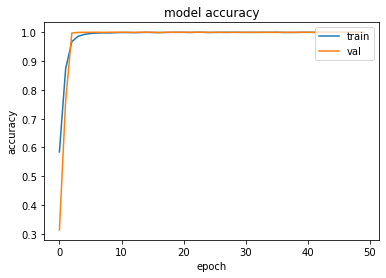

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

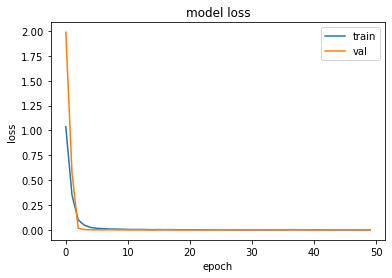

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

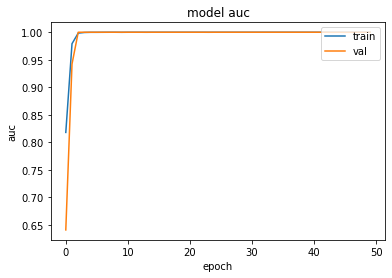

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()